In [1]:
# ==============================================================================
#
# (encoder: ResNet) + (classifier: Softmax)
#
# ==============================================================================

In [10]:
import torch
# import config
from models import *
import torch.nn as nn

data_dir = '../data/'

In [11]:
# Hyper Parameter settings
train_epoch = 100
image_size = 256
crop = 32
batch_size = 2
num_workers = 1
latent_variable_size = 10
lr = 1e-4

# Network setup
encoder = resnet50(pretrained=True)
# decoder = Decoder(DecoderBasicBlock)
decoder = None
# decoder.weight_init(0, 0.02)
net = UVae(encoder=encoder, decoder=decoder, num_classes=101,
           latent_variable_size=latent_variable_size)

In [12]:
net.eval()

UVae(
  (_encoder): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(

In [13]:
net(torch.randn((2, 3, 256, 256))).shape

torch.Size([2, 101])

In [14]:
# ==============================================================================
#
# (encoder: ResNet) + (latent_variable: N(0,1)) + (decoder)
#                   + (classifier: Softmax)
#
# ==============================================================================

In [15]:
# x = torch.randn((2, 3, 256, 256))

# y = net(x, inference=True)
# print(y.shape)

# y, x, mu, sigma = net(x)
# print(y.shape)
# print(x.shape)
# print(mu.shape)
# print(sigma.shape)

In [16]:
# import glob
# import os

# with open('./data/meta/classes.txt', 'r') as f:
#     lines = f.read().splitlines()
    
# for line in lines:
#     os.mkdir('./data/images/' + line)

from dataloader import *

loader = KeyDataLoader(image_size=256, 
                       crop=32)
train_loader, valid_loader, test_loader = loader.run(num_workers=1, 
                       batch_size=2, data_dir=data_dir)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


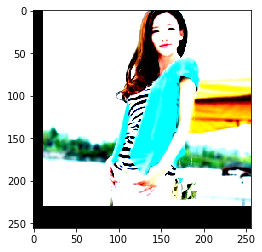

In [17]:
import matplotlib.pyplot as plt

image, target = next(iter(train_loader))
plt.imshow(image[1].permute(1, 2, 0))